## 1단계 : 리뷰 데이터 수집

imdb.load_data(num_words = 10000) : 단어 사전에서 사용 빈도 상위 10000개만 가져옴

In [1]:
import tensorflow as tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

imdb = keras.datasets.imdb
(train_datas, train_labels), (test_datas, test_labels) = imdb.load_data(num_words = 10000)


2025-09-29 02:38:21.712436: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-29 02:38:21.775090: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.11/dist-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/usr/local/lib/python3.11/dist

## 2단계 : 리뷰 데이터 탐색

### 2-1 데이터 형식 확인

train_datas : 문장을 단어들로 나누고, 전체 리뷰에서 그 단어의 빈도수의 순위  
(인덱스 시퀀스)  
train_labels : 긍정적인 리뷰인지, 부정적인 리뷰인지 0/1로 표시  
0 : 부정
1 : 긍정

In [2]:

print(f"훈련 샘플 : {len(train_datas)}\n레이블 : {len(train_labels)}")
print()

print(f"train_datas[0] : {train_datas[0]}")
print(f"train_labels[0] : {train_labels[0]}")
print()

print(f"len(train_datas[0]) : {len(train_datas[0])}")
print(f"len(train_datas[1]) : {len(train_datas[1])}")
print(f"maxlen : {len(max(train_datas, key=len))}")

훈련 샘플 : 25000
레이블 : 25000

train_datas[0] : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
train_labels[0] 

### 2-2 데이터 디코딩

In [3]:
word_index = imdb.get_word_index()

word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

reversed_word_index = {v:k for k,v in word_index.items()}

def decode_review(review):
    return ' '.join(reversed_word_index.get(text, "<ERROR>") for text in review)

print(decode_review(train_datas[0]))


<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

## 3단계 : 데이터 준비

데이터의 길이를 맞추기 위해 \<PAD\>를 사용  
256으로 하는 이유는 DB랑 연관이 있음. short형이 256자까지 허용되기 때문

In [4]:
train_datas = keras.preprocessing.sequence.pad_sequences(train_datas,
                                                         value=word_index["<PAD>"],
                                                         padding="post",
                                                         maxlen=256)

test_datas = keras.preprocessing.sequence.pad_sequences(test_datas,
                                                        value=word_index["<PAD>"],
                                                        padding="post",
                                                        maxlen=256)

print(train_datas[0])

val_datas = train_datas[:10000]
train_datas = train_datas[10000:]

val_labels = train_labels[:10000]
train_labels = train_labels[10000:]

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

## 4단계 : 모델 정의

In [ ]:
vocab_size = 10000
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16, input_shape=(None,))) # 10000개의 데이터를 16차원으로 분석
model.add(keras.layers.GlobalAveragePooling1D())	# 16차원을 1차원으로 만들어주는 레이어 (16차원을 컬럼별로 평균내서 정보를 집약시킴)
model.add(keras.layers.Dense(16,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.summary()

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
W0000 00:00:1759113507.774625     564 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, None, 16)       │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,289 (626.13 KB)

 Trainable params: 160,289 (626.13 KB)

 Non-trainable params: 0 (0.00 B)

## 5단계 : 모델 학습

In [6]:
history = model.fit(train_datas, train_labels,
                    epochs=40,
                    batch_size=512,	# 512개의 데이터를 한 번에 넣고 입력데이터 대해 평균을 내어 학습시킴
                    validation_data=(val_datas, val_labels),	# 한 epoch이 끝날 때마다 val데이터로 평가를 수행
                    verbose=1)

Epoch 1/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5198 - loss: 0.6916 - val_accuracy: 0.5607 - val_loss: 0.6891
Epoch 2/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6387 - loss: 0.6839 - val_accuracy: 0.6614 - val_loss: 0.6782
Epoch 3/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6771 - loss: 0.6677 - val_accuracy: 0.6975 - val_loss: 0.6583
Epoch 4/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7315 - loss: 0.6399 - val_accuracy: 0.7279 - val_loss: 0.6267
Epoch 5/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7658 - loss: 0.6005 - val_accuracy: 0.7733 - val_loss: 0.5853
Epoch 6/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8025 - loss: 0.5527 - val_accuracy: 0.7852 - val_loss: 0.5392
Epoch 7/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8183 - loss: 0.5043 - val_accuracy: 0.8119 - val_loss: 0.4933
Epoch 8/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8363 - loss: 0.4592 - val_accuracy: 0.8289 - v

## 6단계 : 모델 평가

In [7]:
results = model.evaluate(test_datas,test_labels, verbose=2)
print(results)

782/782 - 1s - 2ms/step - accuracy: 0.8730 - loss: 0.3131
[0.3131076693534851, 0.8730400204658508]


## 7단계 : 모델 훈련 평가 시각화

### 7-1 : history 준비

In [8]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


### 7-2 : 훈련/검증 Loss 그래프 표시

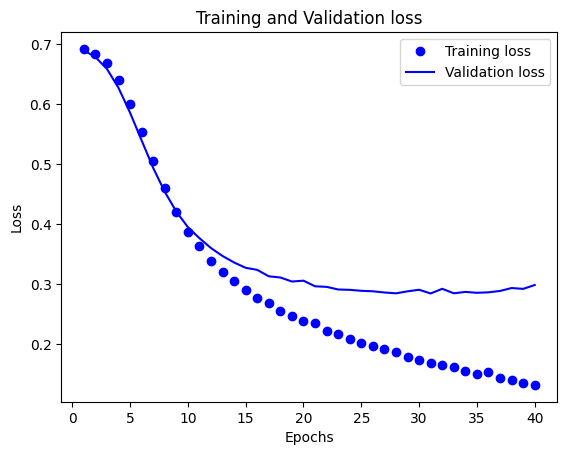

In [9]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'bo', label="Training loss")	# bo : 파란 점
plt.plot(epochs, val_loss, 'b', label="Validation loss")	# b : 파란 선
plt.title("Training and Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 7-3 : 훈련/검증 Accuracy 그래프 표시

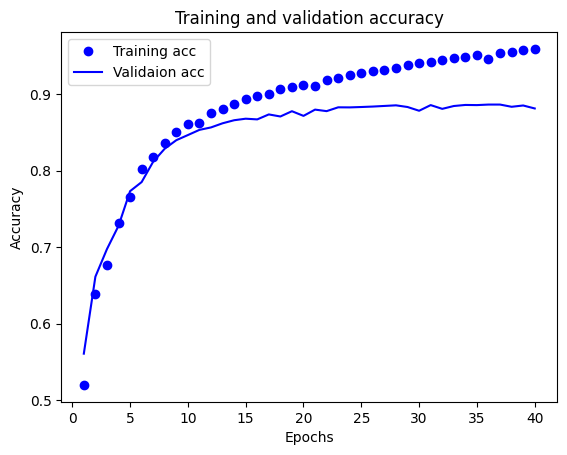

In [10]:
plt.clf()

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validaion acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()